In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [ ]:
def check_outliers(df):
  for col in df.select_dtypes(include=['int64','float64']):
    q3, q1 = np.percentile(df[col], [75 ,25])
    iqr = q3 - q1
    outliers = df[(df[col]>=(q3 + 1.5 * iqr)) | (df[col]<=(q1 - 1.5 * iqr))]
    print(col,'  ', len(outliers))

In [ ]:
def remove_outliers(df):
  for col in df.select_dtypes(include=['int64','float64']):
    q3, q1 = np.percentile(df[col], [75 ,25])
    iqr = q3 - q1
    upper = q1 + 1.5 * iqr
    lower = q1 - 1.5 * iqr 
    df[col].mask(df[col] >= upper, upper, inplace=True)
    df[col].mask(df[col] <= lower, lower, inplace=True)

In [ ]:
def check_multicollinearity(df2):
  X = df2.select_dtypes(include=['float64'])
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
    
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
    
  print(vif_data)

In [ ]:
df = pd.read_csv('loanprediction_data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


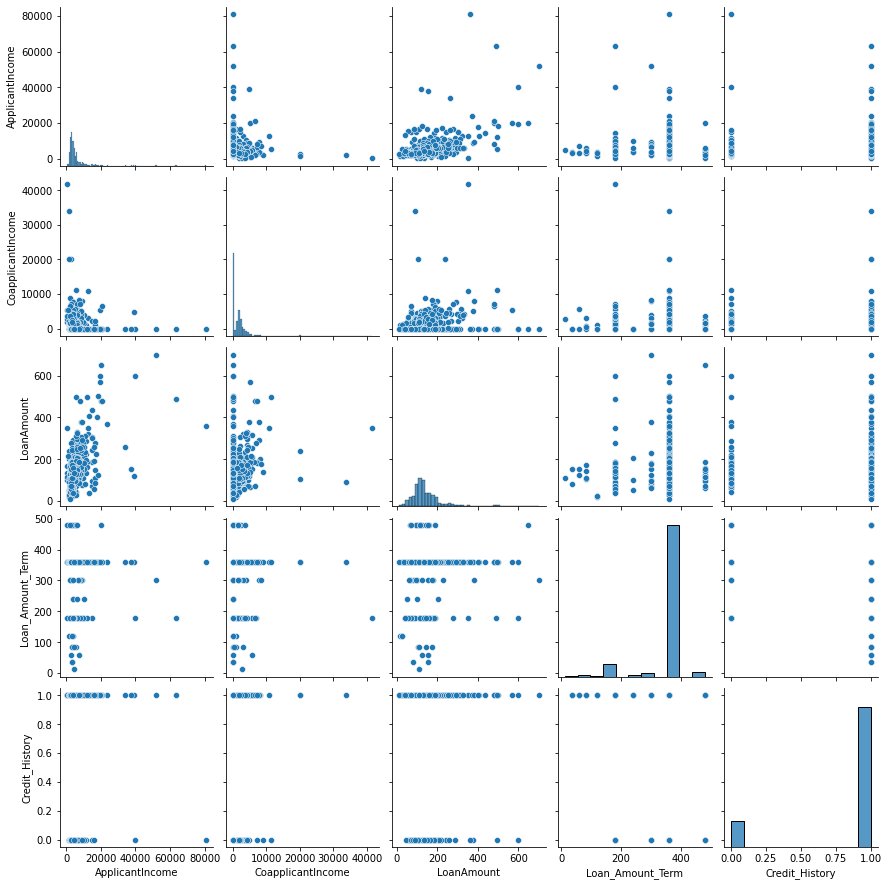

In [ ]:
sns.pairplot(df)

In [ ]:
check_outliers(df)

ApplicantIncome    50
CoapplicantIncome    18
LoanAmount    0
Loan_Amount_Term    0
Credit_History    0


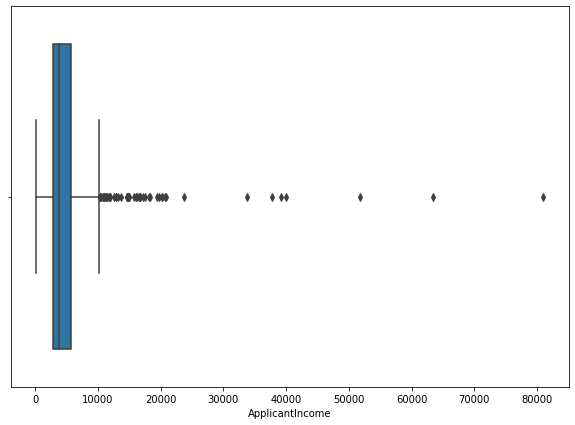

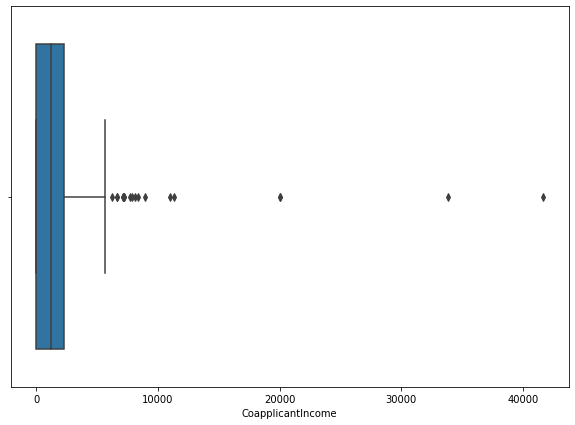

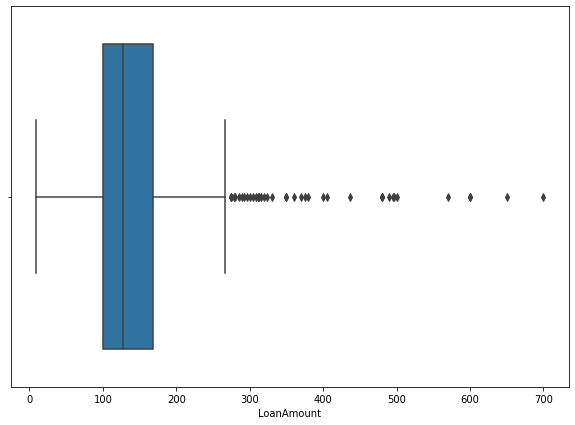

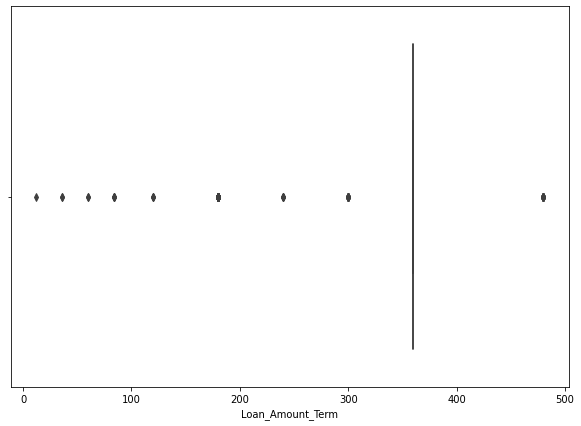

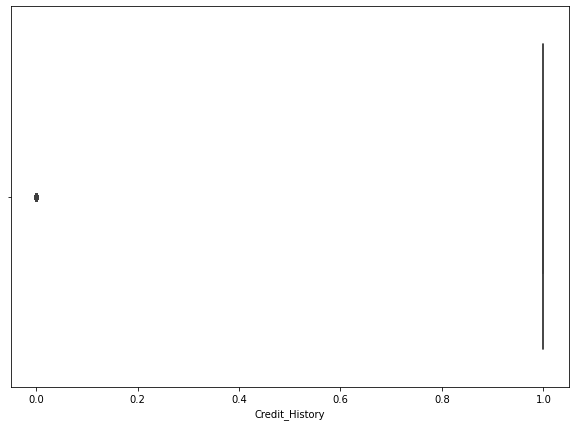

In [ ]:
for col in df.select_dtypes(include=['int64','float64']):
      fig, ax = plt.subplots(figsize=(10,7))
      sns.boxplot(x=df[col])
      plt.show()

In [ ]:
remove_outliers(df)
check_outliers(df)

ApplicantIncome    0
CoapplicantIncome    0
LoanAmount    0
Loan_Amount_Term    0
Credit_History    0


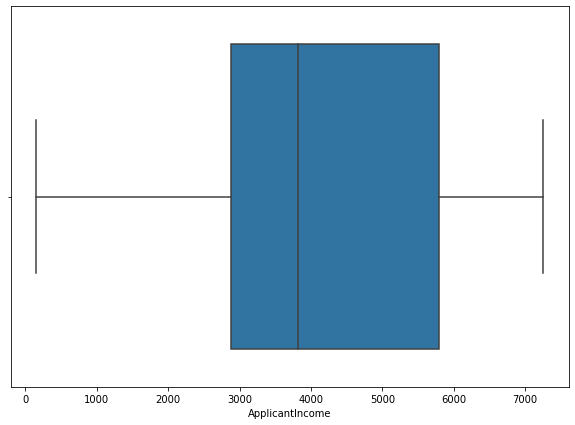

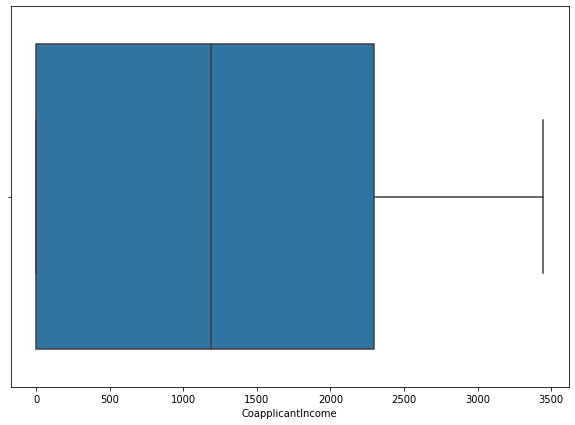

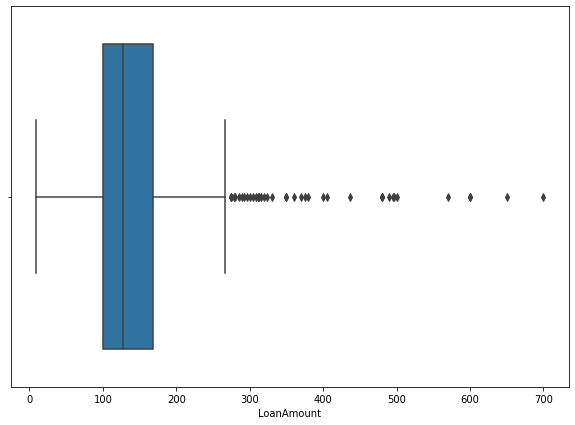

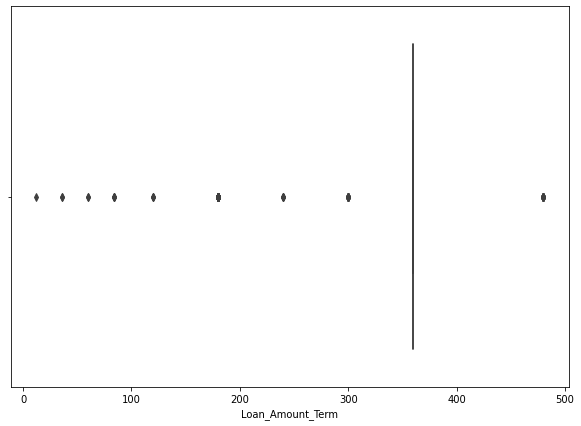

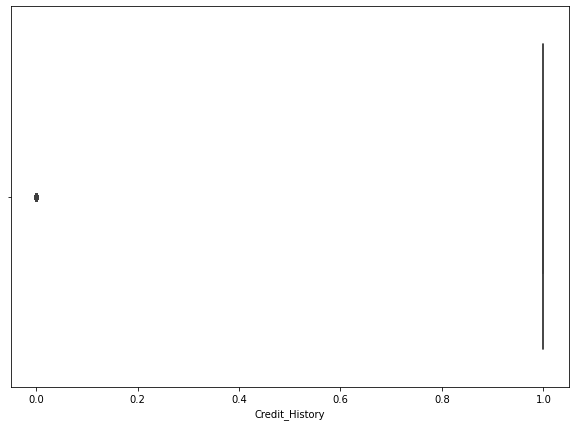

In [ ]:
for col in df.select_dtypes(include=['int64','float64']):
      fig, ax = plt.subplots(figsize=(10,7))
      sns.boxplot(x=df[col])
      plt.show()

In [ ]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

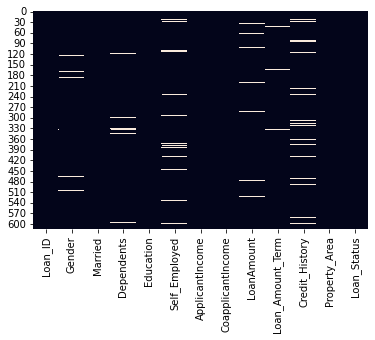

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
for col in df.select_dtypes(include=['object']): 
  df[col].fillna(df[col].mode()[0], inplace=True)
for col in df.select_dtypes(include=['int64','float64']):
  df[col].fillna(df[col].mean(), inplace=True)

In [ ]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

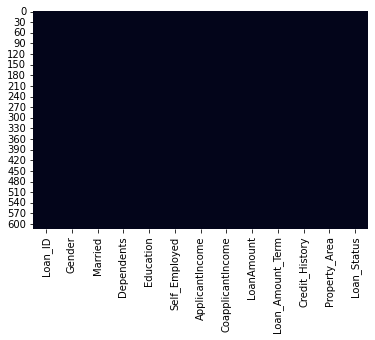

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

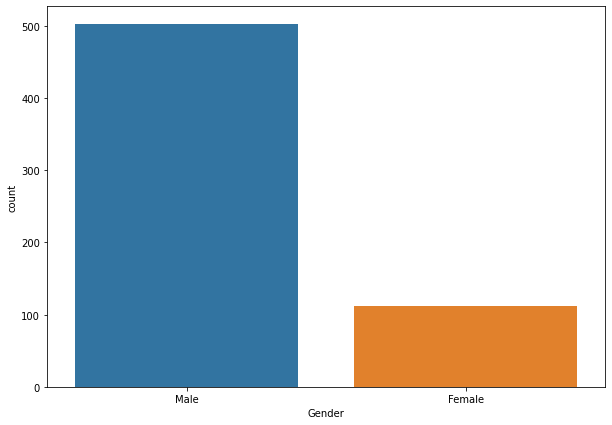

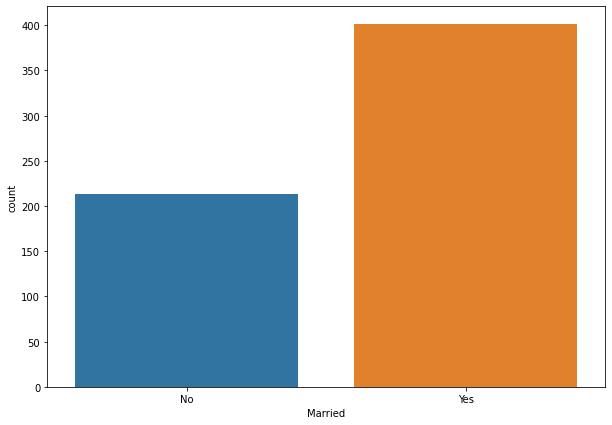

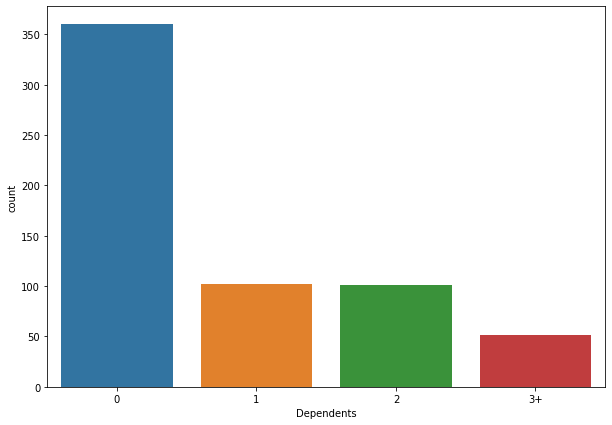

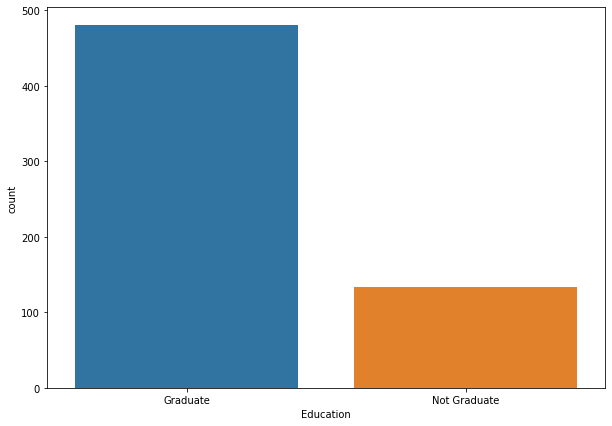

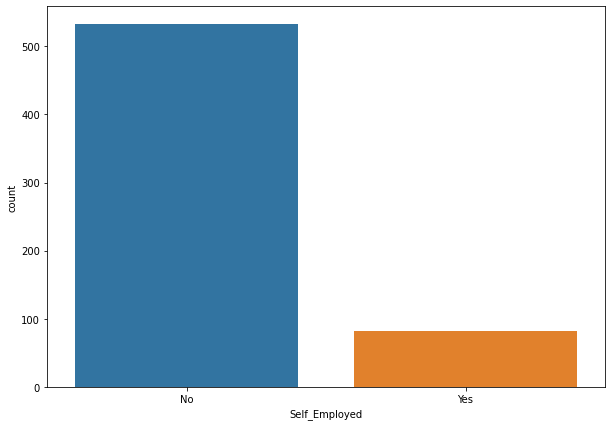

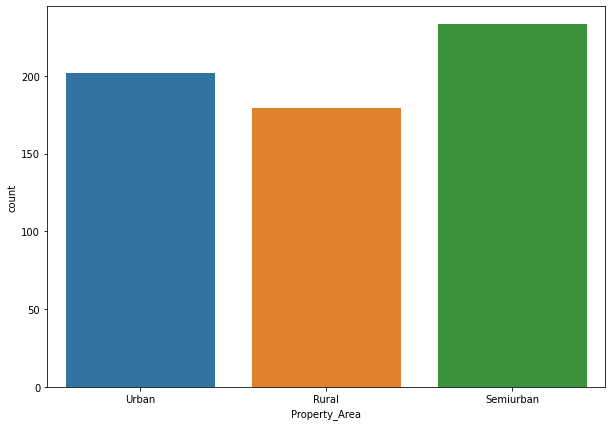

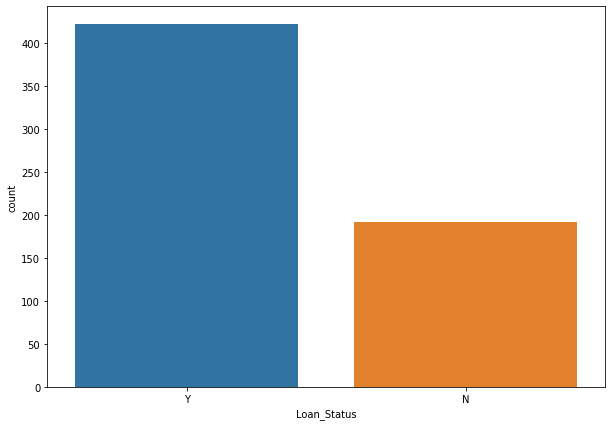

In [ ]:
for col in df.iloc[:, 1:].select_dtypes(include=['object']): 
  fig, ax = plt.subplots(figsize=(10,7))
  sns.countplot(x=col, data=df)
  plt.show()

In [ ]:
df.iloc[:, 1:]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.00,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.00,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.00,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.00,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.00,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.00,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106.00,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,7253.75,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7253.75,0.0,187.000000,360.0,1.0,Urban,Y


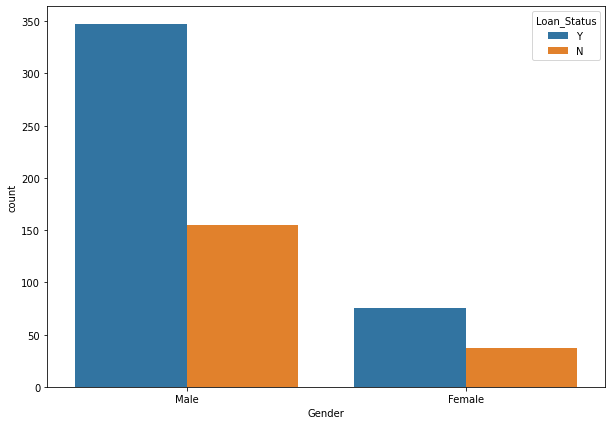

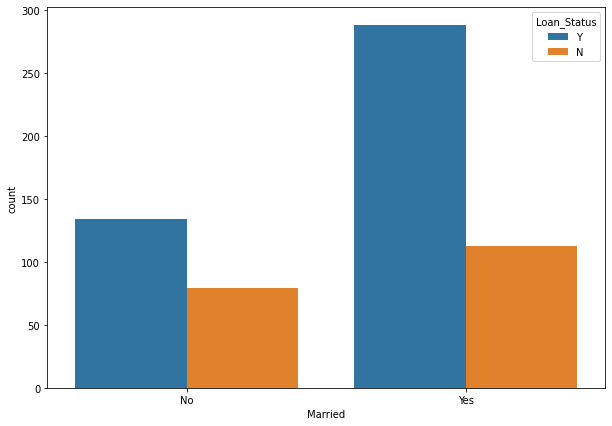

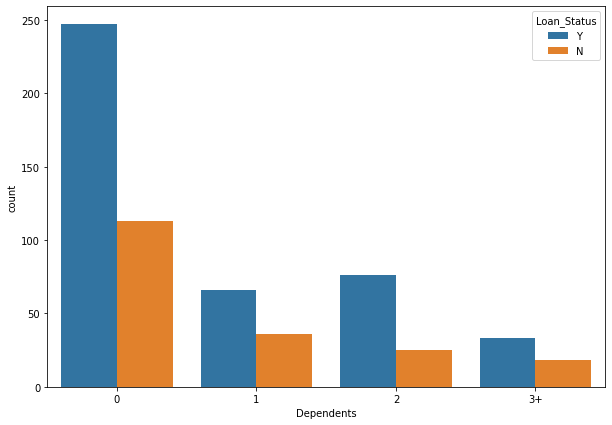

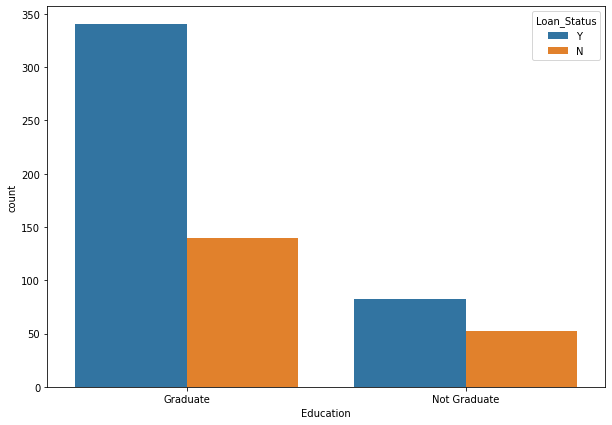

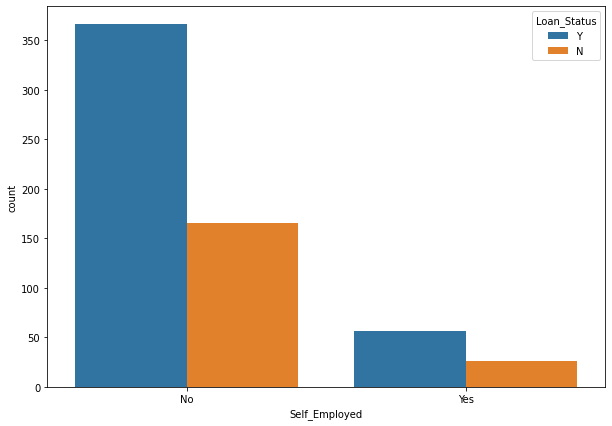

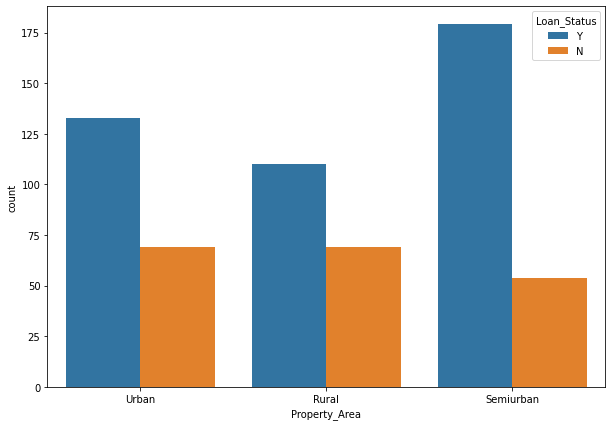

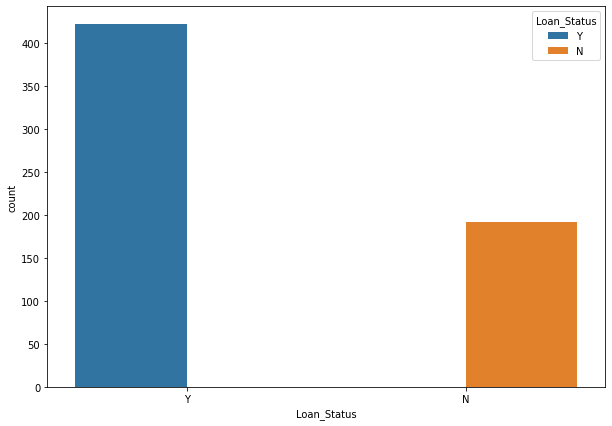

In [ ]:
for col in df.iloc[:, 1:].select_dtypes(include=['object']): 
  fig, ax = plt.subplots(figsize=(10,7))
  sns.countplot(x=col, data=df, hue='Loan_Status')
  plt.show()

In [ ]:
'''pa = ['Urban', 'Semiurban', 'Rural']
df['Property_Area'] = df['Property_Area'].apply(lambda x: pa.index(x))

df['Education'] = df['Education'].apply(lambda x: df['Education'].unique().tolist()[::-1].index(x))

df['Dependents'] = df['Dependents'].apply(lambda x: df['Dependents'].unique().tolist()[::-1].index(x))
df'''
from sklearn.preprocessing import OrdinalEncoder
depcat = ['3+','2', '1', '0']
oe_dependants = OrdinalEncoder(categories=[depcat])
df['Dependents'] = oe_dependants.fit_transform(df[['Dependents']])
grad = ['Not Graduate', 'Graduate']
oe_grad = OrdinalEncoder(categories=[grad])
df['Education'] = oe_grad.fit_transform(df[['Education']])
prop = ['Rural', 'Semiurban', 'Urban']
oe_prop = OrdinalEncoder(categories=[prop])
df['Property_Area'] = oe_prop.fit_transform(df[['Property_Area']])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,3.0,1.0,No,5849.00,0.0,146.412162,360.0,1.0,2.0,Y
1,LP001003,Male,Yes,2.0,1.0,No,4583.00,1508.0,128.000000,360.0,1.0,0.0,N
2,LP001005,Male,Yes,3.0,1.0,Yes,3000.00,0.0,66.000000,360.0,1.0,2.0,Y
3,LP001006,Male,Yes,3.0,0.0,No,2583.00,2358.0,120.000000,360.0,1.0,2.0,Y
4,LP001008,Male,No,3.0,1.0,No,6000.00,0.0,141.000000,360.0,1.0,2.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,3.0,1.0,No,2900.00,0.0,71.000000,360.0,1.0,0.0,Y
610,LP002979,Male,Yes,0.0,1.0,No,4106.00,0.0,40.000000,180.0,1.0,0.0,Y
611,LP002983,Male,Yes,2.0,1.0,No,7253.75,240.0,253.000000,360.0,1.0,2.0,Y
612,LP002984,Male,Yes,1.0,1.0,No,7253.75,0.0,187.000000,360.0,1.0,2.0,Y


In [ ]:
marr = pd.get_dummies(df['Married'],prefix='mar_')
gend = pd.get_dummies(df['Gender'])
selem = pd.get_dummies(df['Self_Employed'], prefix='selfemp_')
#prop = pd.get_dummies(df['Property_Area'])
#dep = pd.get_dummies(df['Dependents'])
#edu = pd.get_dummies(df['Education'])
df.drop(columns = ['Loan_ID', 'Married', 'Gender', 'Self_Employed'], inplace=True)
df2 = pd.concat([df, marr, gend, selem], axis=1)

df2

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,mar__No,mar__Yes,Female,Male,selfemp__No,selfemp__Yes
0,3.0,1.0,5849.00,0.0,146.412162,360.0,1.0,2.0,Y,1,0,0,1,1,0
1,2.0,1.0,4583.00,1508.0,128.000000,360.0,1.0,0.0,N,0,1,0,1,1,0
2,3.0,1.0,3000.00,0.0,66.000000,360.0,1.0,2.0,Y,0,1,0,1,0,1
3,3.0,0.0,2583.00,2358.0,120.000000,360.0,1.0,2.0,Y,0,1,0,1,1,0
4,3.0,1.0,6000.00,0.0,141.000000,360.0,1.0,2.0,Y,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,3.0,1.0,2900.00,0.0,71.000000,360.0,1.0,0.0,Y,1,0,1,0,1,0
610,0.0,1.0,4106.00,0.0,40.000000,180.0,1.0,0.0,Y,0,1,0,1,1,0
611,2.0,1.0,7253.75,240.0,253.000000,360.0,1.0,2.0,Y,0,1,0,1,1,0
612,1.0,1.0,7253.75,0.0,187.000000,360.0,1.0,2.0,Y,0,1,0,1,1,0


In [ ]:
check_multicollinearity(df2)

             feature        VIF
0         Dependents   5.921890
1          Education   4.921268
2    ApplicantIncome   9.820412
3  CoapplicantIncome   2.312778
4         LoanAmount   6.393859
5   Loan_Amount_Term  14.106531
6     Credit_History   6.235789
7      Property_Area   2.596116


In [ ]:
df3 = df2.drop(columns=['Loan_Amount_Term'])
check_multicollinearity(df3)

             feature       VIF
0         Dependents  4.809040
1          Education  4.770234
2    ApplicantIncome  9.047828
3  CoapplicantIncome  2.224426
4         LoanAmount  6.324252
5     Credit_History  5.544792
6      Property_Area  2.517002


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

train_dat=df2.drop(columns=['Loan_Status','Loan_Amount_Term'])
y=df2.Loan_Status
x=np.array(train_dat)
print(x.shape)
y=np.array(y)
print(y.shape)
sc=MinMaxScaler()
ip=sc.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(ip,y,test_size=0.2) 


(614, 13)
(614,)


In [ ]:
ytest

array(['N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)  
predgnb=gnb.predict(xtest) 
cmgnb=confusion_matrix(predgnb,ytest)
print('confusion matrix:\n', cmgnb)
predgnbprf=classification_report(ytest, predgnb)
print('classification report:\n', predgnbprf)
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(gnb,xtrain, ytrain,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

confusion matrix:
 [[16  1]
 [23 83]]
classification report:
               precision    recall  f1-score   support

           N       0.94      0.41      0.57        39
           Y       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.70      0.72       123
weighted avg       0.83      0.80      0.78       123

Cross Validation Scores are [0.82828283 0.81632653 0.76530612 0.84693878 0.79591837]
Average Cross Validation score :0.8105545248402392


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(xtrain, ytrain)
predlog = logreg.predict(xtest)
cmlog = confusion_matrix(predlog, ytest)
print('confusion matrix:\n', cmlog)
predlogprf=classification_report(ytest, predlog)
print('classification report:\n', predlogprf)
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(logreg,xtrain, ytrain,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

confusion matrix:
 [[16  1]
 [23 83]]
classification report:
               precision    recall  f1-score   support

           N       0.94      0.41      0.57        39
           Y       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.70      0.72       123
weighted avg       0.83      0.80      0.78       123

Cross Validation Scores are [0.82828283 0.81632653 0.76530612 0.84693878 0.78571429]
Average Cross Validation score :0.8085137085137086


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000)
rf.fit(xtrain,ytrain)
predrf=rf.predict(xtest)
cmrf=confusion_matrix(predrf,ytest)
print('confusion matrix:\n', cmrf)
predrfprf=classification_report(ytest, predrf)
print('classification report:\n', predrfprf)
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(rf,xtrain, ytrain,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

confusion matrix:
 [[16  5]
 [23 79]]
classification report:
               precision    recall  f1-score   support

           N       0.76      0.41      0.53        39
           Y       0.77      0.94      0.85        84

    accuracy                           0.77       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.77      0.77      0.75       123

Cross Validation Scores are [0.78787879 0.81632653 0.7244898  0.81632653 0.78571429]
Average Cross Validation score :0.786147186147186


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnclass = KNeighborsClassifier(n_neighbors=5)
knnclass.fit(xtrain, ytrain)
predknn=knnclass.predict(xtest)
cmknn=confusion_matrix(predknn,ytest)
print(cmknn)
predknnprf=classification_report(ytest, predknn)
print('classification report:\n', predknnprf)
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(knnclass,xtrain, ytrain,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

[[12  8]
 [27 76]]
classification report:
               precision    recall  f1-score   support

           N       0.60      0.31      0.41        39
           Y       0.74      0.90      0.81        84

    accuracy                           0.72       123
   macro avg       0.67      0.61      0.61       123
weighted avg       0.69      0.72      0.68       123

Cross Validation Scores are [0.7979798  0.7755102  0.7244898  0.82653061 0.75510204]
Average Cross Validation score :0.7759224902082045


In [ ]:
import pickle
data = {"model": logreg, "oe_dependants": oe_dependants, "oe_grad": oe_grad,
        "oe_prop":oe_prop}
with open('trainedmodel.sav', 'wb') as file:
    pickle.dump(data, file)
    
    
with open('trainedmodel.sav', 'rb') as file:
    data = pickle.load(file)

lr_model = data["model"]
oe_dependants = data["oe_dependants"]
oe_grad = data["oe_grad"]
oe_prop = data["oe_prop"]

y_pred = lr_model.predict(xtest)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)